<a href="https://colab.research.google.com/github/Jan2309jr/Integrated-Retail-Analytics-for-Store-Optimization/blob/main/Integrated_Retail_Analytics_for_Store_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Advanced Machine Learning
##### **Contribution**    - Individual
##### **Author - Janani Ravi**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

[Click here](https://github.com/Jan2309jr/Integrated-Retail-Analytics-for-Store-Optimization.git)

# **Problem Statement**


**Write Problem Statement Here.**

# **Implemenation**

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import zscore

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


### Dataset Loading

In [ ]:
# Load Dataset
features_df=pd.read_csv('https://raw.githubusercontent.com/Jan2309jr/Integrated-Retail-Analytics-for-Store-Optimization/refs/heads/main/data/Features%20data%20set.csv')
sales_df=pd.read_csv('https://raw.githubusercontent.com/Jan2309jr/Integrated-Retail-Analytics-for-Store-Optimization/refs/heads/main/data/sales%20data-set.csv')
stores_df=pd.read_csv('https://raw.githubusercontent.com/Jan2309jr/Integrated-Retail-Analytics-for-Store-Optimization/refs/heads/main/data/stores%20data-set.csv')

### Dataset First View

In [ ]:
# features data set
features_df.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [ ]:
# sales data set
sales_df.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False

In [ ]:
# stores data set
stores_df.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
shape_df=pd.DataFrame({
    "Dataset":["Features","Sales","Stores"],
    "Rows":[features_df.shape[0],sales_df.shape[0],stores_df.shape[0]],
    "Columns":[features_df.shape[1],sales_df.shape[1],stores_df.shape[1]],
})
shape_df

Dataset    Rows  Columns
0  Features    8190       12
1     Sales  421570        5
2    Stores      45        3

### Dataset Information

In [ ]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


#### Duplicate Values

In [ ]:
# features dataset
features_df.duplicated().sum()

np.int64(0)

In [ ]:
# sales dataset
sales_df.duplicated().sum()

np.int64(0)

In [ ]:
# stores dataset
stores_df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [ ]:
sales_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [ ]:
stores_df.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

<Axes: >

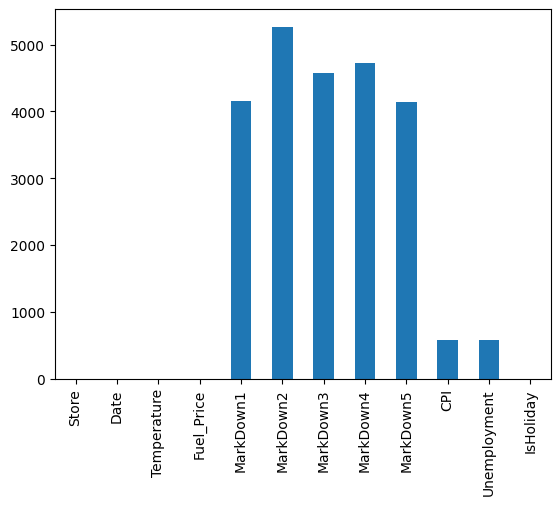

In [ ]:
# Visualizing the missing values
features_df.isnull().sum().plot(kind='bar')

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
features_df.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [ ]:
sales_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [ ]:
stores_df.columns

Index(['Store', 'Type', 'Size'], dtype='object')

In [ ]:
# Dataset Describe
features_df.describe()

Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821  
std     11276.462208   6792.329861   13086.690278    39.738346      1.877259  
min      -179.260000      0.220000    -185.170000   126.064000      3.684000  
25%         6.600000    304.687500    1440.827500   132.364839      6.634000  
50%        36.260000   1176.425000    2727.135000   182.764003      7.806000  
75%       163.150000   3310.007500    4832.555000   213.932412      8.567000  
max    149483.310000  67474.850000  771448.100000   228.976456     14.313000

In [ ]:
sales_df.describe()

Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000

In [ ]:
stores_df.describe()

Store           Size
count  45.000000      45.000000
mean   23.000000  130287.600000
std    13.133926   63825.271991
min     1.000000   34875.000000
25%    12.000000   70713.000000
50%    23.000000  126512.000000
75%    34.000000  202307.000000
max    45.000000  219622.000000

### Variables Description

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
features_df.nunique()

Store             45
Date             182
Temperature     4178
Fuel_Price      1011
MarkDown1       4023
MarkDown2       2715
MarkDown3       2885
MarkDown4       3405
MarkDown5       4045
CPI             2505
Unemployment     404
IsHoliday          2
dtype: int64

In [ ]:
sales_df.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
dtype: int64

In [ ]:
stores_df.nunique()

Store    45
Type      3
Size     40
dtype: int64

## 3. ***Data Wrangling***

### Handling Missing Values

In [ ]:
features_df=features_df.dropna()

In [ ]:
features_df.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

### Handling Date Values

In [ ]:
features_df.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
92      1  11/11/2011        59.11       3.297   10382.90    6115.67   
93      1  18/11/2011        62.25       3.308    6074.12     254.39   
94      1  25/11/2011        60.14       3.236     410.31      98.00   
95      1  02/12/2011        48.91       3.172    5629.51      68.00   
96      1  09/12/2011        43.93       3.158    4640.65      19.00   

    MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
92     215.07    2406.62    6551.42  217.998085         7.866      False  
93      51.98     427.39    5988.57  218.220509         7.866      False  
94   55805.51       8.00     554.92  218.467621         7.866       True  
95    1398.11    2084.64   20475.32  218.714733         7.866      False  
96     105.02    3639.42   14461.82  218.961846         7.866      False

In [ ]:
features_df_copy=features_df.copy()
features_df_copy['Date']=pd.to_datetime(features_df_copy['Date'],dayfirst=True, errors='coerce')

In [ ]:
sales_df.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False

In [ ]:
sales_df_copy=sales_df.copy()
sales_df_copy['Date']=pd.to_datetime(sales_df_copy['Date'],dayfirst=True, errors='coerce')

### **Removing Irrelevant Columns**

In [ ]:
stores_df.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [ ]:
stores_df_copy = stores_df.copy()
stores_df_copy = stores_df_copy.drop(['Store'], axis=1)

In [ ]:
features_df_copy.head()

Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
92      1 2011-11-11        59.11       3.297   10382.90    6115.67   
93      1 2011-11-18        62.25       3.308    6074.12     254.39   
94      1 2011-11-25        60.14       3.236     410.31      98.00   
95      1 2011-12-02        48.91       3.172    5629.51      68.00   
96      1 2011-12-09        43.93       3.158    4640.65      19.00   

    MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
92     215.07    2406.62    6551.42  217.998085         7.866      False  
93      51.98     427.39    5988.57  218.220509         7.866      False  
94   55805.51       8.00     554.92  218.467621         7.866       True  
95    1398.11    2084.64   20475.32  218.714733         7.866      False  
96     105.02    3639.42   14461.82  218.961846         7.866      False

In [ ]:
stores_df_copy.head()

Type    Size
0    A  151315
1    A  202307
2    B   37392
3    A  205863
4    B   34875

In [ ]:
sales_df_copy.head()

Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-02-05      24924.50      False
1      1     1 2010-02-12      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-03-05      21827.90      False

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Exploratory Data Analysis***

### ***Univariant***

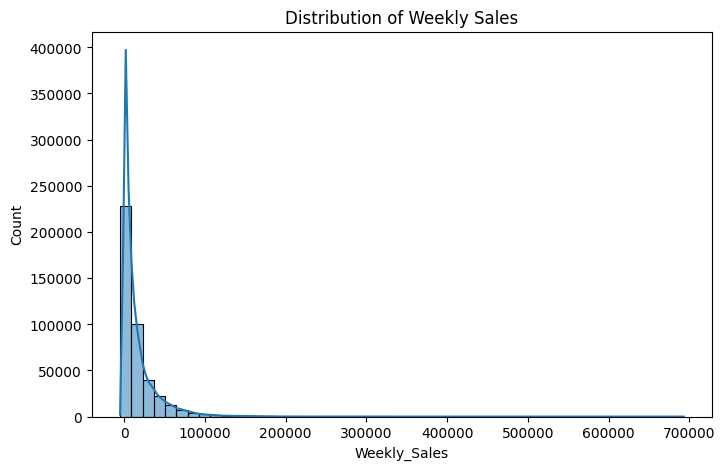

In [ ]:
# 1. Univariate - Distribution of Weekly Sales
plt.figure(figsize=(8,5))
sns.histplot(sales_df_copy['Weekly_Sales'], bins=50, kde=True)
plt.title("Distribution of Weekly Sales")
plt.show()

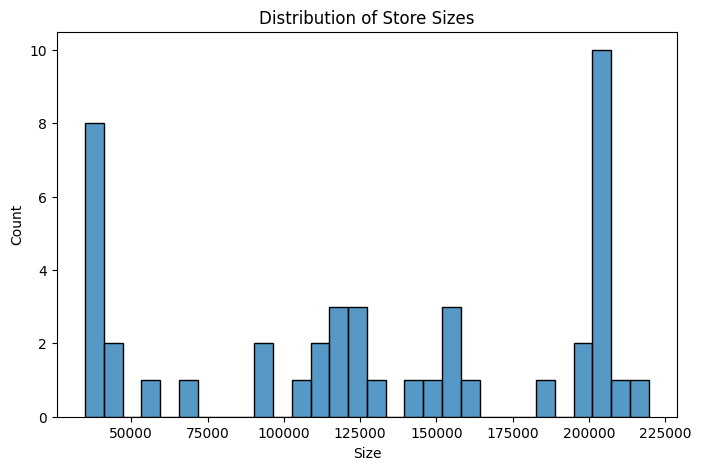

In [ ]:
# 2. Univariate - Store Sizes
plt.figure(figsize=(8,5))
sns.histplot(stores_df_copy['Size'], bins=30, kde=False)
plt.title("Distribution of Store Sizes")
plt.show()

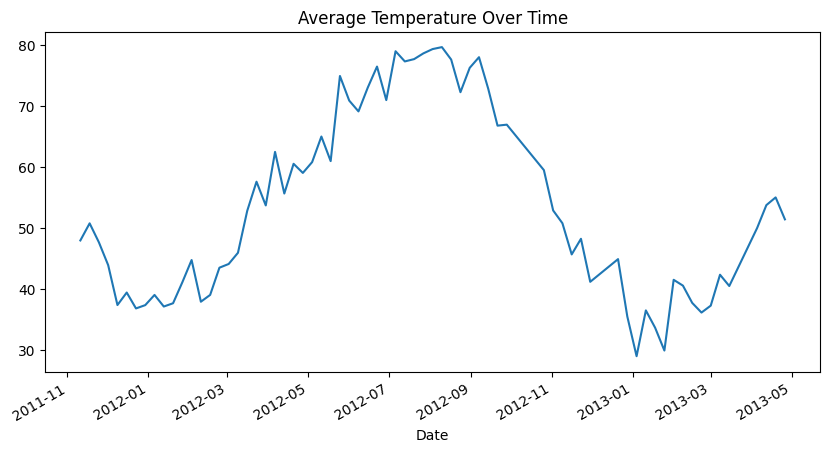

In [ ]:
# 3. Univariate - Temperature Trends
plt.figure(figsize=(10,5))
features_df_copy.groupby('Date')['Temperature'].mean().plot()
plt.title("Average Temperature Over Time")
plt.show()

### ***Bivariant***

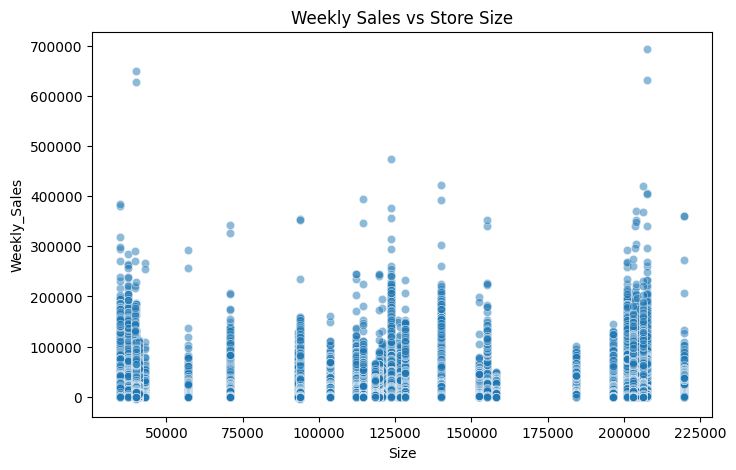

In [ ]:
# 4. Bivariate - Weekly Sales vs. Store Size
merged1 = sales_df_copy.merge(stores_df_copy, left_on="Store", right_index=True)
plt.figure(figsize=(8,5))
sns.scatterplot(data=merged1, x="Size", y="Weekly_Sales", alpha=0.5)
plt.title("Weekly Sales vs Store Size")
plt.show()

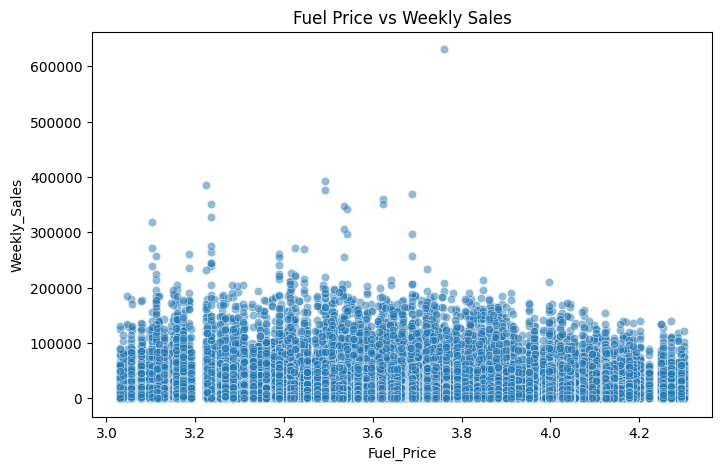

In [ ]:
# 5. Bivariate - Fuel Price vs Weekly Sales
merged2 = sales_df_copy.merge(features_df_copy, on=["Store", "Date"], how="inner")
plt.figure(figsize=(8,5))
sns.scatterplot(data=merged2, x="Fuel_Price", y="Weekly_Sales", alpha=0.5)
plt.title("Fuel Price vs Weekly Sales")
plt.show()

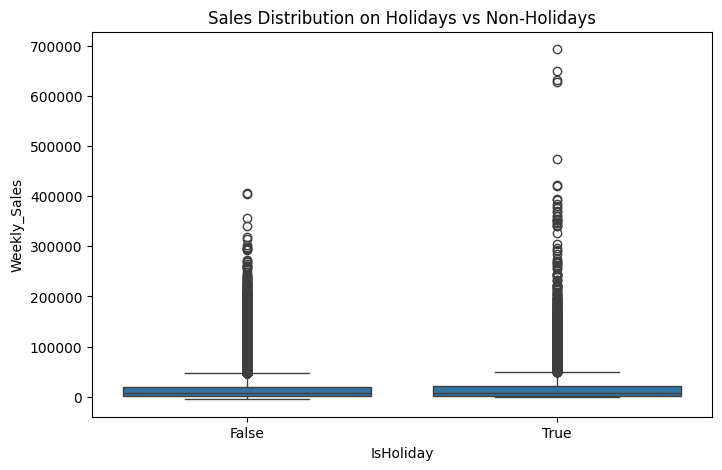

In [ ]:
# 6. Bivariate - Holiday effect on Sales
plt.figure(figsize=(8,5))
sns.boxplot(data=sales_df_copy, x="IsHoliday", y="Weekly_Sales")
plt.title("Sales Distribution on Holidays vs Non-Holidays")
plt.show()

### ***Multivariant***

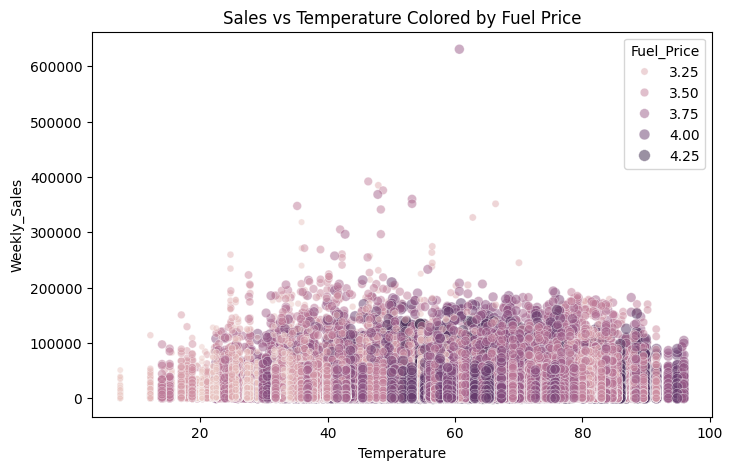

In [ ]:
# 7. Multivariate - Sales, Temperature, Fuel Price
plt.figure(figsize=(8,5))
sns.scatterplot(data=merged2, x="Temperature", y="Weekly_Sales", hue="Fuel_Price", size="Fuel_Price", alpha=0.5)
plt.title("Sales vs Temperature Colored by Fuel Price")
plt.show()

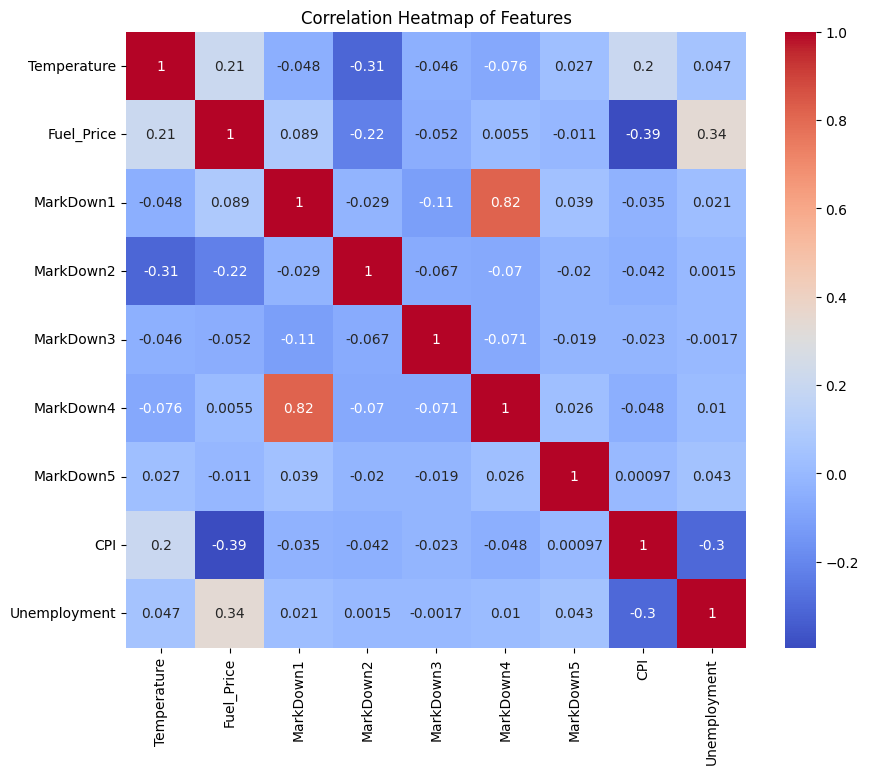

In [ ]:
# 8. Multivariate - Correlation heatmap of Features
plt.figure(figsize=(10,8))
sns.heatmap(features_df_copy.drop(columns=['Store','Date','IsHoliday']).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()

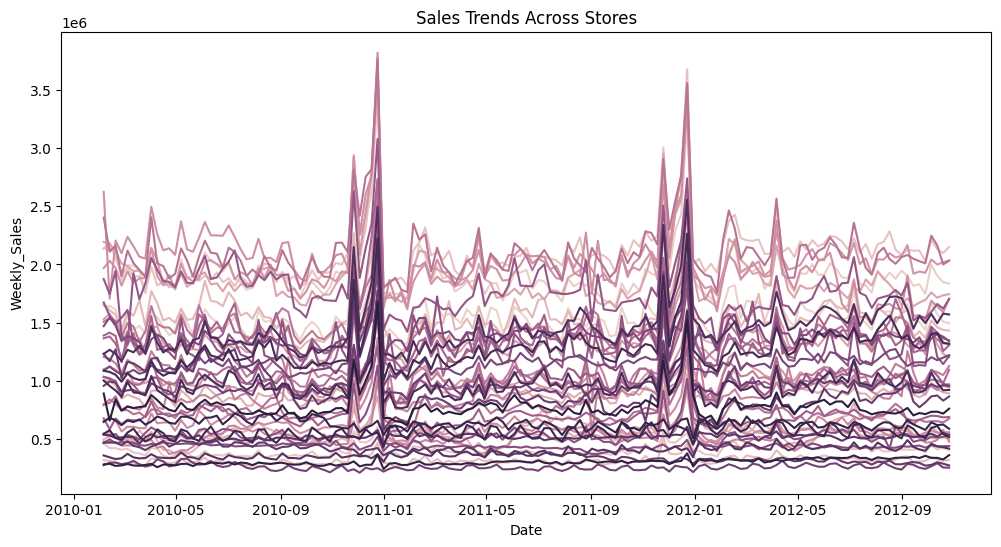

In [ ]:
# 9. Multivariate - Sales Trend Across Stores
sales_trend = sales_df_copy.groupby(['Date','Store'])['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=sales_trend, x="Date", y="Weekly_Sales", hue="Store", legend=False)
plt.title("Sales Trends Across Stores")
plt.show()

In [ ]:
# 10. Multivariate - Pairplot of Numerical Features
sns.pairplot(features_df_copy[['Temperature','Fuel_Price','CPI','Unemployment']])
plt.suptitle("Pairwise Plots of Key Features", y=1.02)
plt.show()

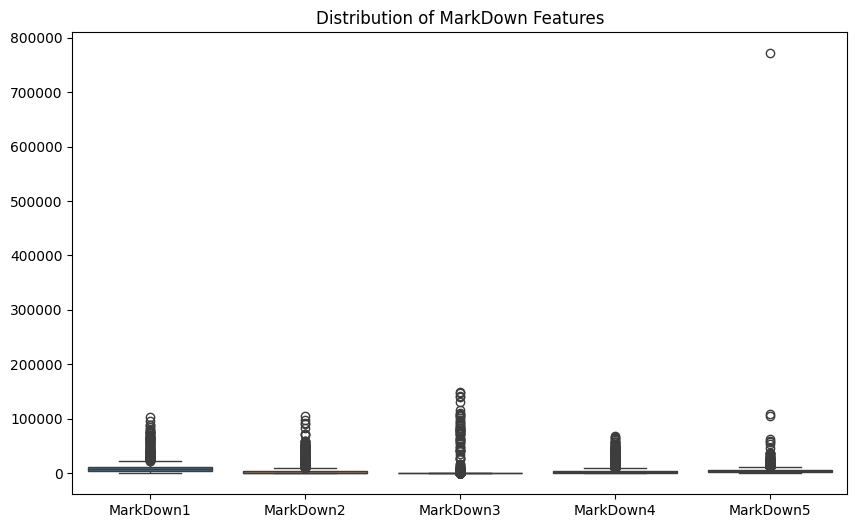

In [ ]:
# 11. Multivariate - MarkDowns effect
markdowns = features_df_copy[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
plt.figure(figsize=(10,6))
sns.boxplot(data=markdowns)
plt.title("Distribution of MarkDown Features")
plt.show()

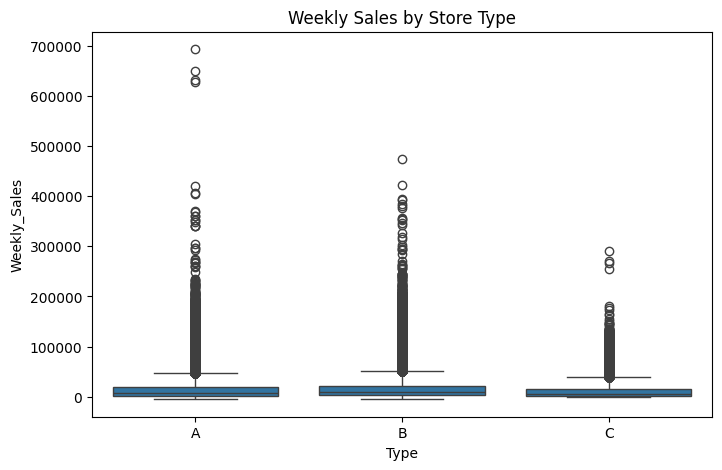

In [ ]:
# 12. Multivariate - Store Type vs Weekly Sales
merged3 = sales_df_copy.merge(stores_df_copy, left_on="Store", right_index=True)
plt.figure(figsize=(8,5))
sns.boxplot(data=merged3, x="Type", y="Weekly_Sales")
plt.title("Weekly Sales by Store Type")
plt.show()

## ***5. Hypothesis Testing***

**Univariate insights → Hypotheses**

1. Weekly sales are highly skewed → A small fraction of departments or stores may be responsible for most revenue.
2. Store sizes are unevenly distributed → Larger stores may naturally generate higher sales.
3. Temperature varies seasonally → Seasonal effects could drive demand for certain products.

**Bivariate insights → Hypotheses**
1. Store size vs weekly sales shows positive relationship → Bigger stores sell more, controlling for holiday effects.
2. Fuel price vs weekly sales shows weak or no clear trend → Customer shopping behavior may not depend directly on fuel costs.
3. Holiday weeks show higher median sales → Promotions and holiday traffic significantly boost revenue.

**Multivariate insights → Hypotheses**
1. Temperature and fuel price jointly impact sales volatility → Warmer weeks with low fuel price may increase store visits.
2. MarkDown campaigns have mixed effects across categories → Some markdowns correlate strongly with spikes in sales, others show little impact.
3. CPI and unemployment correlate with weekly sales → Higher unemployment may depress sales regardless of promotions.
4. Store type (A, B, etc.) moderates sales patterns → Type A stores outperform B, suggesting structural differences (location, size, assortment).
5. Time-series trends suggest long-term growth is uneven → Certain stores consistently outperform across years, hinting at local demographic or competition factors.

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
# Merge the datasets
# First, convert 'Date' column to datetime objects
sales_df_copy['Date'] = pd.to_datetime(sales_df_copy['Date'])
features_df_copy['Date'] = pd.to_datetime(features_df_copy['Date'])

# Merge sales and features dataframes on 'Store' and 'Date'
merged_df = pd.merge(sales_df_copy, features_df_copy, on=['Store', 'Date'], how='left')

# Merge with stores dataframe on 'Store'
merged_df = pd.merge(merged_df, stores_df_copy, on='Store', how='left')

# --- Date-based features ---
merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Week'] = merged_df['Date'].dt.isocalendar().week.astype(int)
merged_df['Day'] = merged_df['Date'].dt.day
merged_df['DayOfWeek'] = merged_df['Date'].dt.dayofweek
merged_df['IsHoliday'] = merged_df['IsHoliday_x'] | merged_df['IsHoliday_y'] # Handle potential duplicate IsHoliday columns
# You can also add features like "days since last holiday" etc.

# --- External factor interactions ---
# Create interaction terms between external factors and store type
merged_df['CPI_TypeA'] = merged_df['CPI'] * (merged_df['Type'] == 'A')
merged_df['Unemployment_TypeB'] = merged_df['Unemployment'] * (merged_df['Type'] == 'B')

print("Feature Engineering Complete. New features added.")
merged_df.head()

## **7. Anomaly Detection**

In [ ]:
from sklearn.ensemble import IsolationForest

# --- Statistical Anomaly Detection (Z-score) ---
# Calculate Z-score for weekly sales per store
merged_df['Sales_ZScore'] = merged_df.groupby('Store')['Weekly_Sales'].transform(
    lambda x: (x - x.mean()) / x.std()
)

# Flag anomalies where Z-score is outside a certain threshold (e.g., +/- 3)
merged_df['IsAnomaly_ZScore'] = (np.abs(merged_df['Sales_ZScore']) > 3).astype(int)

# --- Machine Learning Anomaly Detection (Isolation Forest) ---
# Use Isolation Forest on multiple features to find anomalies
# Select relevant numerical features for anomaly detection
features_for_anomaly = ['Weekly_Sales', 'CPI', 'Unemployment', 'Fuel_Price']
anomaly_model = IsolationForest(contamination=0.01, random_state=42)
merged_df['IsAnomaly_IF'] = anomaly_model.fit_predict(merged_df[features_for_anomaly])

# IsolationForest returns -1 for outliers and 1 for inliers. Convert to 1/0.
merged_df['IsAnomaly_IF'] = merged_df['IsAnomaly_IF'].apply(lambda x: 1 if x == -1 else 0)

print("\nAnomaly Detection Complete. Anomaly flags added.")
merged_df.head()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Aggregate data to the store level for clustering
store_data = merged_df.groupby('Store').agg(
    Avg_Weekly_Sales=('Weekly_Sales', 'mean'),
    Avg_Markdown=('Markdown1', 'mean'),
    Store_Size=('Size', 'first'),
    Store_Type=('Type', 'first')
).reset_index()

# Handle missing Markdown values (if any) and one-hot encode categorical features
store_data = store_data.fillna(0)
store_data = pd.get_dummies(store_data, columns=['Store_Type'], drop_first=True)

# Select features and scale them for clustering
features_for_segmentation = ['Avg_Weekly_Sales', 'Avg_Markdown', 'Store_Size', 'Store_Type_B', 'Store_Type_C']
scaler = StandardScaler()
store_scaled = scaler.fit_transform(store_data[features_for_segmentation])

# Determine the optimal number of clusters using the elbow method (optional, but good practice)
# inertia = []
# for k in range(1, 10):
#     kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
#     kmeans.fit(store_scaled)
#     inertia.append(kmeans.inertia_)
# print(inertia) # You would plot this to find the "elbow"

# Apply K-Means with a chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
store_data['Customer_Segment'] = kmeans.fit_predict(store_scaled)

print("\nCustomer Segmentation Complete. Segments assigned to each store.")
print(store_data.head())

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Create a 'transaction' dataframe where each row is a week-store combination
# and columns are departments, with a value of 1 if there was a sale
basket = (merged_df.groupby(['Date', 'Store', 'Dept'])['Weekly_Sales']
          .sum().unstack().reset_index().fillna(0)
          .set_index(['Date', 'Store']))

# Convert sales values to a binary representation (1 if sale > 0, 0 otherwise)
def encode_units(x):
    return 1 if x > 0 else 0
basket_sets = basket.applymap(encode_units)

# Apply the Apriori algorithm to find frequent itemsets (department combinations)
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

print("\nMarket Basket Analysis Complete. Top association rules:")
print(rules.sort_values(by='lift', ascending=False).head())

In [ ]:
from prophet import Prophet

# Filter data for a single store and department for demonstration
# You would loop through all stores/departments in a real project
store_id = 1
dept_id = 1
forecast_df = merged_df[(merged_df['Store'] == store_id) & (merged_df['Dept'] == dept_id)].copy()

# Prophet requires specific column names: 'ds' for date and 'y' for the target variable
forecast_df.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'}, inplace=True)

# Add external factors (regressors) to the model
# It's important to have these for both the historical and future dataframes
external_regressors = ['CPI', 'Unemployment', 'Fuel_Price', 'IsHoliday_x']
# Note: You'd need to create a future dataframe with these values for forecasting
# For simplicity, we'll train the model here

# Initialize and fit the Prophet model
model = Prophet()
for regressor in external_regressors:
    model.add_regressor(regressor)
model.fit(forecast_df[['ds', 'y'] + external_regressors])

# Create a future dataframe to make predictions
future_dates = model.make_future_dataframe(periods=52, freq='W') # 52 weeks into the future

# You would need to populate future_dates with estimated values for the regressors
# For this example, we'll just show the setup
# Example: future_dates['CPI'] = ...

# Make the forecast (this part won't run without future regressor data)
# forecast = model.predict(future_dates)
# print("\nDemand Forecasting Complete. Forecast for future weeks:")
# print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

print("\nDemand Forecasting model setup complete. You would now use this model to predict future sales.")

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.